In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/FAOSTAT_data_12-6-2019.csv')

In [5]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1961,1961,tonnes,0.0,NaN,Official data
1,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1962,1962,tonnes,0.0,NaN,Official data
2,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1963,1963,tonnes,0.0,NaN,Official data
3,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1964,1964,tonnes,0.0,NaN,Official data
4,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1965,1965,tonnes,0.0,NaN,Official data


In [6]:
df.Element.value_counts()

Import Value       68464
Import Quantity    68358
Export Quantity    54663
Export Value       54556
Name: Element, dtype: int64

In [7]:
df.Unit.value_counts()

tonnes      123021
1000 US$    123020
Name: Unit, dtype: int64

### FRUIT PIE CHART DATA

In [8]:
import_quant = df[(df['Element'] == 'Import Quantity')]
total_import_quants = import_quant.groupby(['Item']).sum()['Value']

In [11]:
total_import_quants.to_csv('fruit_quantity_pie.csv', index = True, header = False)

([<matplotlib.patches.Wedge at 0x26ab0a3d550>,
 [Text(0.919632,0.603554,'Apples'),
  Text(-0.895855,0.638313,'Bananas'),
  Text(-0.806694,-0.747826,'Blueberries'),
  Text(-0.78596,-0.769588,'Cherries'),
  Text(-0.541814,-0.957308,'Grapes'),
  Text(-0.0964044,-1.09577,'Lemons and limes'),
  Text(0.691529,-0.855446,'Oranges'),
  Text(1.08835,-0.159697,'Watermelons')])

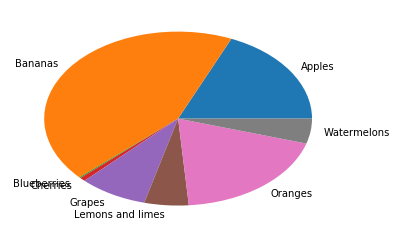

In [20]:
plt.pie(total_import_quants, labels = total_import_quants.index)

In [12]:
import_val = df[(df['Element'] == 'Import Value')]
total_import_vals = import_val.groupby(['Item']).sum()['Value'] # Units in 1000 US $

In [17]:
total_import_vals.to_csv('fruit_value_pie.csv', index = True, header = False)

([<matplotlib.patches.Wedge at 0x26aaf985dd8>,
 [Text(0.907978,0.620948,'Apples'),
  Text(-0.700313,0.84827,'Bananas'),
  Text(-1.0737,-0.239081,'Blueberries'),
  Text(-1.02169,-0.407617,'Cherries'),
  Text(-0.526647,-0.965734,'Grapes'),
  Text(0.283894,-1.06273,'Lemons and limes'),
  Text(0.880453,-0.659395,'Oranges'),
  Text(1.0962,-0.0913568,'Watermelons')])

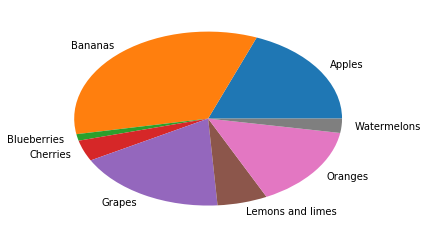

In [13]:
plt.pie(total_import_vals, labels = total_import_vals.index)

### POTASSIUM BAR CHART DATA

In [29]:
#Units in mg, potassium per 1 serving of fruit
potassium_data = pd.Series([195, 422, 114, 268, 176, 80, 237, 314],
                           index = ['Apples', 'Bananas', 'Blueberries', 'Cherries', 'Grapes',
                                    'Lemons and limes', 'Oranges', 'Watermelons']) 
potassium_data

Apples              195
Bananas             422
Blueberries         114
Cherries            268
Grapes              176
Lemons and limes     80
Oranges             237
Watermelons         314
dtype: int64

<BarContainer object of 8 artists>

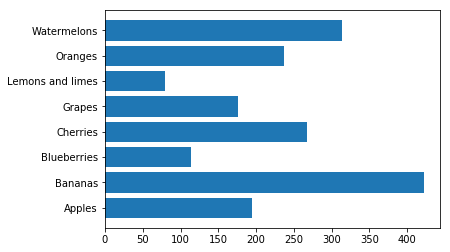

In [30]:
plt.barh(y = potassium_data.index, width = potassium_data)

In [31]:
potassium_data.to_csv('potassium_bar.csv', index = True, header = False)

### BANANA ECONOMY LINE CHART DATA

In [32]:
df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1961,1961,tonnes,0.0,NaN,Official data
1,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1962,1962,tonnes,0.0,NaN,Official data
2,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1963,1963,tonnes,0.0,NaN,Official data
3,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1964,1964,tonnes,0.0,NaN,Official data
4,TP,Crops and livestock products,2,Afghanistan,5610,Import Quantity,515,Apples,1965,1965,tonnes,0.0,NaN,Official data


In [33]:
export_val = df[(df['Element'] == 'Export Value') & (df['Item'] == 'Bananas')]
total_export_vals = export_val.groupby(['Year']).sum()['Value']

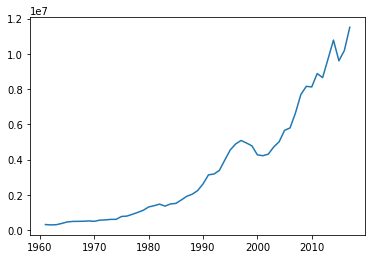

In [35]:
plt.plot(total_export_vals)

In [36]:
total_export_vals.to_csv('banana_sales_line.csv', index = True, header = False)